# Quantum Full Adder

This jupyter notebook is for decimal number addition based on quantum computer (qubits). First we convert decimal numbers to binary numbers and according to that we build a quantum circuit to execute addition operation. Here we check the length of the binary number and build the circuit accordingly, for shorter binary numbers, refer to file "Specified additions". 



## Restriction


If your computer have 16GB (16128M) of ram maximum input value you can write is '31'.

For input values between '32-64' you will need 32GB (32768M) of RAM.

For input values between '64-128' you will need 1TB (1048576M) of RAM

#### Refer to "Addition(improved).ipynb" for less restriction


Binary representation of 5 is 101
Binary representation of 5 is 101


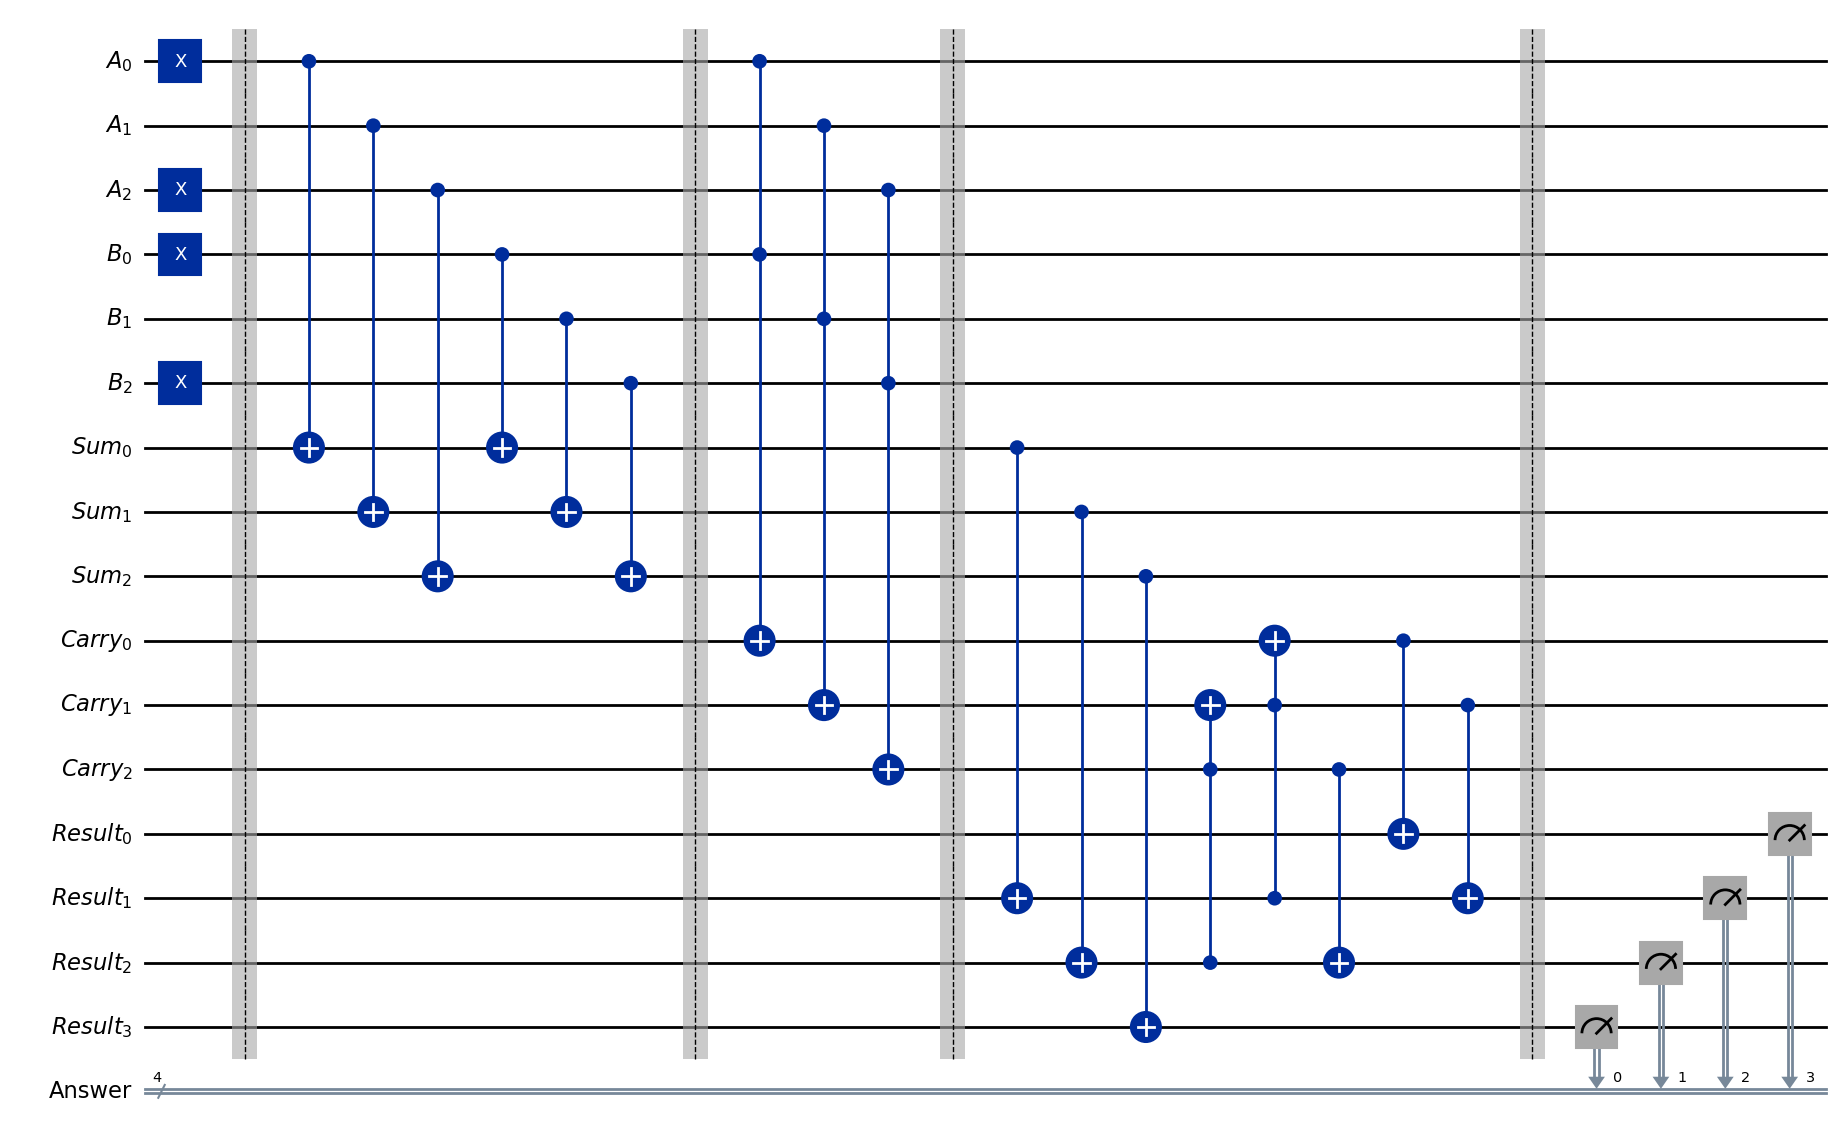

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister



# Function to convert a decimal number to binary
def decimal_to_binary(decimal_value):
    return bin(decimal_value)[2:]

# Decimal values wanted to add
decimal1 = int(input("Enter the first decimal value: "))
decimal2 = int(input("Enter the second decimal value: "))

# Converting decimal values to binary
x = decimal_to_binary(decimal1)
y = decimal_to_binary(decimal2)

# Padding the shorter binary number with leading zeros
max_length = max(len(x), len(y))
x = x.zfill(max_length)
y = y.zfill(max_length)

print(f"Binary representation of {decimal1} is {x}")
print(f"Binary representation of {decimal2} is {y}")



# Qubit number(n) selection

if len(x)>len(y):
    n = len(x)
else:
    n = len(y)


#A is first number's register and B is second number's register.

A = QuantumRegister(n, 'A')
B = QuantumRegister(n , 'B')

S = QuantumRegister(n , 'Sum')
C = QuantumRegister(n , 'Carry')
R = QuantumRegister(n+1 , 'Result')

Ans = ClassicalRegister(n+1 ,'Answer')

qc = QuantumCircuit(A,B,S,C,R,Ans)






#installation of input numbers to the quantum circuit

for i, bit in enumerate(x):
    if bit == '1':
        qc.x(A[i])

for i, bit in enumerate(y):
    if bit == '1':
        qc.x(B[i])





qc.barrier()

#Add A[n] and B[n] values and copy them in S[n] (Sum) register

for i in range(n):
    qc.cx(A[i],S[i])
    qc.cx(B[i],S[i])


qc.barrier()

#checks if both A[n] and B[n] are '1' and copy result on C[n] (carry) register


for i in range(n):
    qc.ccx(A[i],B[i],C[i])



qc.barrier()

#apply sum to result
for i in range(n):
    qc.cx(S[i],R[i+1])


#carry modification
for i in range(n-1):
    qc.ccx(R[n-1-i],C[n-1-i],C[n-2-i])

#modified carry to result
for i in range(n):
    qc.cx(C[i],R[i])



qc.barrier()


for i in range(n+1):
    qc.measure(R[n-i],Ans[i])



d = input("Show circuit (y/n)")

if d == "y":
    display(qc.draw("mpl", fold = -1))
else:
    pass





{'1010': 1024}


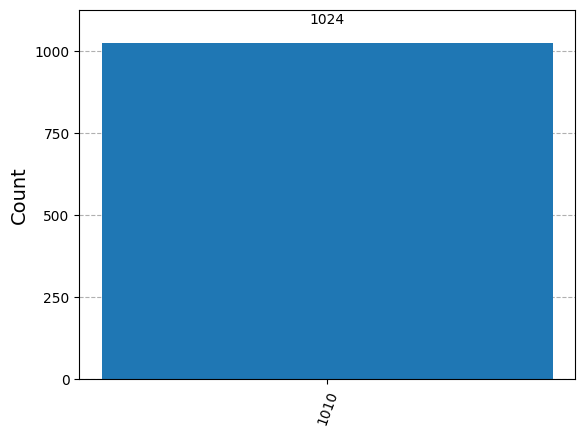

Decimal value of binary 1010 is: 10


In [2]:
from qiskit_aer import AerSimulator


result = AerSimulator().run(qc).result()
stats = result.get_counts()

print(stats)

from qiskit.visualization import plot_histogram


p = input("Show histogram (y/n): ")

if p == "y":
    display(plot_histogram(stats))
else:
    pass



# Function to convert a binary number to decimal
def binary_to_decimal(binary_value):
    return int(binary_value, 2)

# Extract the binary number from stats
binary_number = list(stats.keys())[0]

# Convert the binary number to a decimal value
decimal_value = binary_to_decimal(binary_number)

# Print the decimal value
print(f"Decimal value of binary {binary_number} is: {decimal_value}")